# Test food-classifier

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Create labels
labels = ['food', 'non-food']

# Load the finetuned model
model = keras.models.load_model('food-classifier_resnet50.h5')

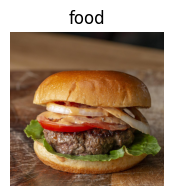

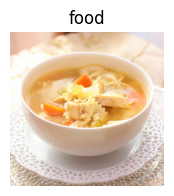

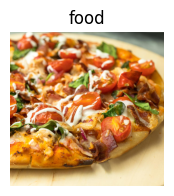

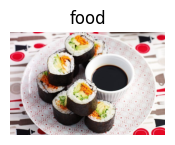

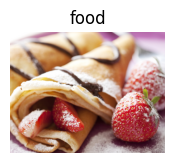

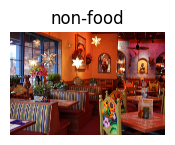

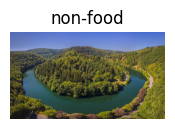

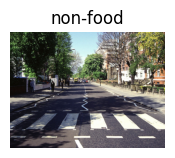

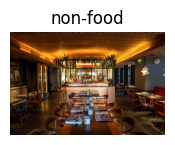

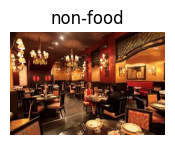

In [50]:
# Enter URL to test
food_pics = ['https://img.buzzfeed.com/thumbnailer-prod-us-east-1/video-api/assets/165384.jpg',
             'https://onedishkitchen.com/wp-content/uploads/2015/02/chicken-soup-one-dish-kitchen-square-1200.jpg',
             'https://img.buzzfeed.com/thumbnailer-prod-us-east-1/video-api/assets/216054.jpg',
             'https://img.taste.com.au/4SZrUrY6/w720-h480-cfill-q80/taste/2016/11/sushi-for-kids-81300-1.jpeg',
             'https://d3iso9mq9tb10q.cloudfront.net/magefan_blog/p/o/popular-french-food_article.jpg']


nonfood_pics = ['https://i.pinimg.com/originals/8f/4b/25/8f4b2508e643cf8b4ebf8561fedf6325.jpg',
                'https://www.visitluxembourg.com/fileadmin/_processed_/3/6/csm_Sure_river_loop_near_Camping_Esch-sur-Sure_-_Alfonso_Salgueiro_01_966879b9c5.jpg',
                'https://media.cntraveler.com/photos/53daa0036dec627b149f7a12/4:3/w_935,h_701,c_limit/abbey-road-london.jpg',
                'https://www.spoon-restaurant.com/wp-content/uploads/2022/06/Spoon_cLe_Bonbon-1-scaled.jpg',
                'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlK4fzFq403LXvd8jy1hSWWreNyN0KHjoR4w&usqp=CAU']

def prediction(url):
    # Download the image from the URL
    response = requests.get(url)
    img = load_img(BytesIO(response.content))

    # Preprocess the image
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    pred = model.predict(img_array, verbose=0)
    pred_label = labels[np.argmax(pred)]
    
    # Show image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(pred_label)
    plt.axis('off')
    plt.show()
    return pred_label, plt.show()

for url in food_pics:
    prediction(url)

for url in nonfood_pics:
    prediction(url)
